# Group Project Milestone 1

Task: You will describe your dataset, discuss a few interesting and important questions that you wish to answer using the dataset, present at least three different visualizations of the data, and discuss how these visualizations give insight into the questions you seek to answer. The report will be submitted as a pdf of maximum 4 pages.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsa
import seaborn as sns
import csv

## Data Description and Exploration

...

In [4]:
#accidents2019 = pd.read_csv('acc_19.csv') #,on_bad_lines='skip' ,quoting=csv.QUOTE_NONE
accidents2019 = pd.read_csv('acc_19.csv', sep=',',quotechar='"',quoting=csv.QUOTE_MINIMAL)
pd.set_option('display.max_columns', None)
accidents2019

,CASENUM,STRATUM,STRATUMNAME,REGION,REGIONNAME,PSU,PJ,PSU_VAR,URBANICITY,URBANICITYNAME,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERMVIT,PERNOTMVIT,NUM_INJ,NUM_INJNAME,MONTH,MONTHNAME,YEAR,YEARNAME,DAY_WEEK,DAY_WEEKNAME,HOUR,HOURNAME,MINUTE,MINUTENAME,HARM_EV,HARM_EVNAME,ALCOHOL,ALCOHOLNAME,MAX_SEV,MAX_SEVNAME,MAN_COLL,MAN_COLLNAME,RELJCT1,RELJCT1NAME,RELJCT2,RELJCT2NAME,TYP_INT,TYP_INTNAME,WRK_ZONE,WRK_ZONENAME,REL_ROAD,REL_ROADNAME,LGT_COND,LGT_CONDNAME,WEATHER1,WEATHER1NAME,WEATHER2,WEATHER2NAME,WEATHER,WEATHERNAME,SCH_BUS,SCH_BUSNAME,INT_HWY,INT_HWYNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,PSUSTRAT,WEIGHT,WKDY_IM,WKDY_IMNAME,HOUR_IM,HOUR_IMNAME,MINUTE_IM,MINUTE_IMNAME,EVENT1_IM,EVENT1_IMNAME,MANCOL_IM,MANCOL_IMNAME,RELJCT2_IM,RELJCT2_IMNAME,LGTCON_IM,LGTCON_IMNAME,WEATHR_IM,WEATHR_IMNAME,MAXSEV_IM,MAXSEV_IMNAME,NO_INJ_IM,NO_INJ_IMNAME,ALCHL_IM,ALCHL_IMNAME,DUMMY
0,201901174219,10,Stratum 10 - Other,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",75,4144,75,2,Rural Area,1,1,0,0,1,0,0,No Person Injured/Property Damage Only Crash,1,January,2019,2019,3,Tuesday,8,8:00am-8:59am,6,6,33,Curb,2,No Alcohol Involved,0,No Apparent Injury (O),0,The First Harmful Event was Not a Collision wi...,1,Yes,5,Entrance/Exit Ramp Related,1,Not an Intersection,0,None,3,On Median,1,Daylight,10,Cloudy,0,No Additional Atmospheric Conditions,10,Cloudy,0,No,0,No,0,None,0,None,0,None,19,203.665120,3,Tuesday,8,8:00am-8:59am,6,6,33,Curb,0,The First Harmful Event was Not a Collision wi...,5,Entrance/Exit Ramp Related,1,Daylight,10,Cloudy,0,No Apparent Injury (O),0,No Person Injured/Property Damage Only Crash,2,No Alcohol Involved,NaN
1,201901176655,6,Stratum 6 - LMY PV Minor Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",63,4135,63,2,Rural Area,2,2,0,0,6,0,2,2,1,January,2019,2019,3,Tuesday,2,2:00am-2:59am,12,12,12,Motor Vehicle In-Transport,9,Reported as Unknown,1,Possible Injury (C),6,Angle,8,Not Reported,2,Intersection,2,Four-Way Intersection,0,None,1,On Roadway,3,Dark - Lighted,1,Clear,0,No Additional Atmospheric Conditions,1,Clear,0,No,0,No,0,None,0,None,0,None,16,59.073459,3,Tuesday,2,2:00am-2:59am,12,12,12,Motor Vehicle In-Transport,6,Angle,2,Intersection,3,Dark - Lighted,1,Clear,1,Possible Injury (C),2,2,2,No Alcohol Involved,NaN
2,201901176667,8,Stratum 8 - NLMY PV Minor Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",65,4138,65,1,Urban Area,2,2,0,0,2,0,2,2,1,January,2019,2019,3,Tuesday,5,5:00am-5:59am,33,33,12,Motor Vehicle In-Transport,1,Alcohol Involved,2,Suspected Minor Injury (B),6,Angle,8,Not Reported,8,Driveway Access Related,1,Not an Intersection,0,None,1,On Roadway,3,Dark - Lighted,1,Clear,0,No Additional Atmospheric Conditions,1,Clear,0,No,0,No,0,None,0,None,0,None,13,133.664224,3,Tuesday,5,5:00am-5:59am,33,33,12,Motor Vehicle In-Transport,6,Angle,8,Driveway Access Related,3,Dark - Lighted,1,Clear,2,Suspected Minor Injury (B),2,2,1,Alcohol Involved,NaN
3,201901176694,9,Stratum 9 - LMY PV No Injuries in Crash,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",12,4142,12,1,Urban Area,1,1,0,0,1,0,0,No Person Injured/Property Damage Only Crash,1,January,2019,2019,3,Tuesday,4,4:00am-4:59am,8,8,59,Traffic Sign Support,2,No Alcohol Involved,0,No Apparent Injury (O),0,The First Harmful Event was Not a Collision wi...,8,Not Reported,3,Intersection-Related,3,T-Intersection,0,None,4,On Roadside,3,Dark - Lighted,1,Clear,0,No Additional Atmospheric Conditions,1,Clear,0,No,0,No,0,None,0,None,0,None,12,153.783414,3,Tuesday,4,4:00am-4:59am,8,8,59,Traffic Sign Support,0,The First Harmful Event was Not a Collision wi...,3,Intersection-Related,3,Dark - Lighted,1,Clear,0,No Apparent Injury (O),0,No Person Injured/Property Damage Only Crash,2,No Alcohol Involved,NaN
4,201901176702,6,Stratum 6 - LMY PV Minor Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",12,4142,12,1,Urban Area,2,2,0,0,3,0,1,1,1,January,2019,2019,3,Tuesday,9,9:00am-9:59am,41,41,12,Motor Vehicle In-Transport,2,No Alcohol Involved,1,Possible Injury (C),6,

## Question 1, 2, 3...

*insert work here*

### Demographic Exploration

In [17]:
#load and view demo data from person csv , sep=',',quotechar='"',quoting=csv.QUOTE_MINIMAL
victims2019= pd.read_csv('pers_19.csv')
pd.set_option('display.max_columns', None)
victims2019

UnicodeDecodeError: ignored

In [5]:
#getting a count of accidents by intersection type as its own dataframe
g=accidents2019['TYP_INTNAME'].value_counts()
frame = {'intersections': g}
intersections = pd.DataFrame(frame)
intersections

,intersections
Not an Intersection,28916
Four-Way Intersection,12726
Not Reported,6992
T-Intersection,5317
Y-Intersection,185
Roundabout,115
"Five Point, or More",63
Traffic Circle,56
L-Intersection,28
Reported as Unknown,11


<Axes: >

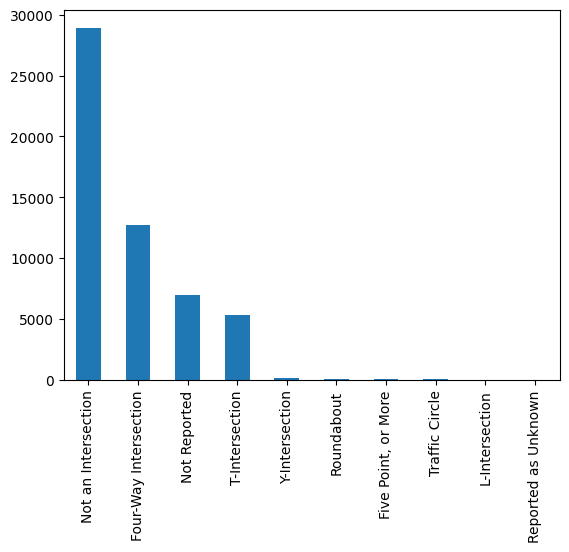

In [6]:
accidents2019['TYP_INTNAME'].value_counts().plot(kind='bar')

<Axes: ylabel='TYP_INTNAME'>

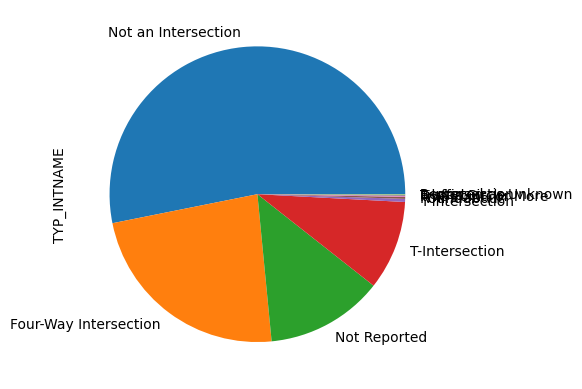

In [7]:
accidents2019['TYP_INTNAME'].value_counts().plot(kind='pie')

...

## Question 4

### What are the leading factors present in accidents? 
Potential factors to Explore: Weather related/non driver fault, seatbealt usage, driver neglect, alcohol consumption, lighting conditions

,LGTCON_IMNAME,CASENUM
0,Daylight,0.688857
1,Dark - Lighted,0.166296
2,Dark - Not Lighted,0.098844
3,Dusk,0.023250
4,Dawn,0.016431
5,Dark - Unknown Lighting,0.005955
6,Other,0.000368


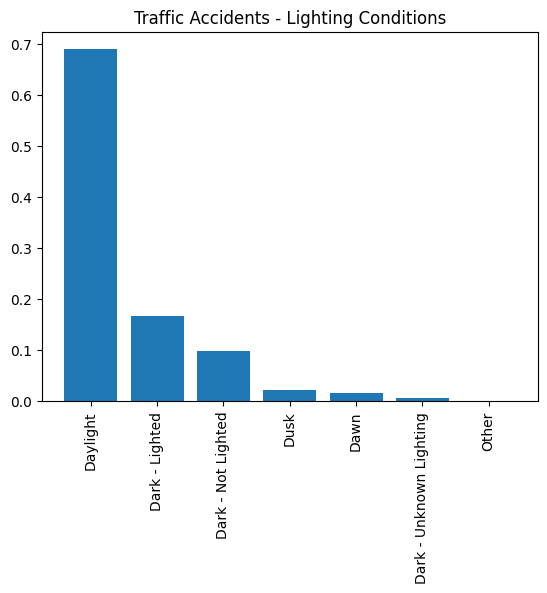

In [8]:
lighting = accidents2019.groupby('LGTCON_IMNAME')['CASENUM'].count().sort_values(ascending=False).reset_index()
lighting['CASENUM'] = lighting['CASENUM']/len(accidents2019)

display(lighting)

plt.bar(lighting['LGTCON_IMNAME'], lighting['CASENUM'])
plt.xticks(rotation = 90)
plt.title("Traffic Accidents - Lighting Conditions")
plt.show()

,WEATHR_IMNAME,CASENUM
0,Clear,0.722197
1,Cloudy,0.149203
2,Rain,0.101564
3,Snow,0.019206
4,"Fog, Smog, Smoke",0.004043
5,Sleet or Hail,0.001342
6,Blowing Snow,0.000625
7,Other,0.000607
8,Severe Crosswinds,0.000570
9,Freezing Rain or Drizzle,0.000459


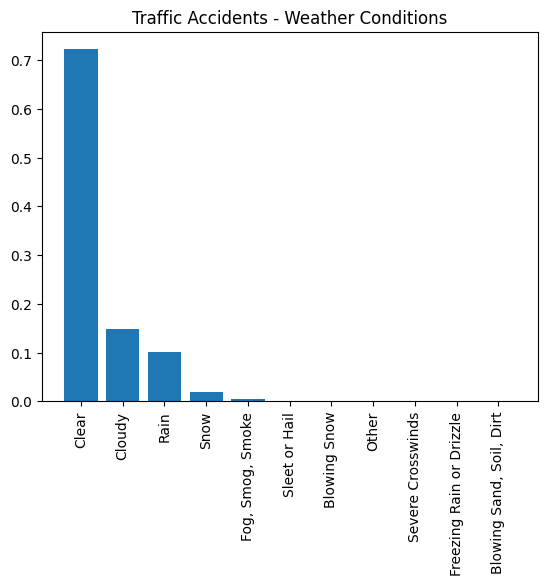

In [9]:
weather = accidents2019.groupby('WEATHR_IMNAME')['CASENUM'].count().sort_values(ascending=False).reset_index()
weather['CASENUM'] = weather['CASENUM']/len(accidents2019)

display(weather)

plt.bar(weather['WEATHR_IMNAME'], weather['CASENUM'])
plt.xticks(rotation = 90)
plt.title("Traffic Accidents - Weather Conditions")
plt.show()

,ALCOHOLNAME,CASENUM
0,No Alcohol Involved,0.636200
1,Reported as Unknown,0.318238
2,Alcohol Involved,0.045029
3,No applicable person,0.000533


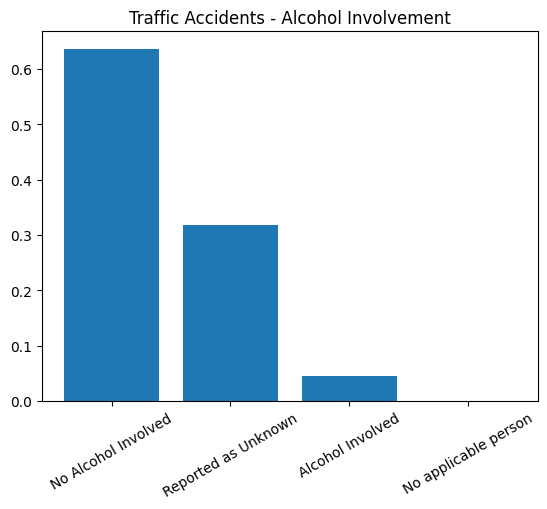

In [10]:
alcohol = accidents2019.groupby('ALCOHOLNAME')['CASENUM'].count().sort_values(ascending=False).reset_index()
alcohol['CASENUM'] = alcohol['CASENUM']/len(accidents2019)

display(alcohol)

plt.bar(alcohol['ALCOHOLNAME'], alcohol['CASENUM'])
plt.xticks(rotation = 30)
plt.title("Traffic Accidents - Alcohol Involvement")
plt.show()

,TYP_INTNAME,CASENUM
0,Not an Intersection,0.531456
1,Four-Way Intersection,0.233895
2,Not Reported,0.128508
3,T-Intersection,0.097723
4,Y-Intersection,0.003400
5,Roundabout,0.002114
6,"Five Point, or More",0.001158
7,Traffic Circle,0.001029
8,L-Intersection,0.000515
9,Reported as Unknown,0.000202


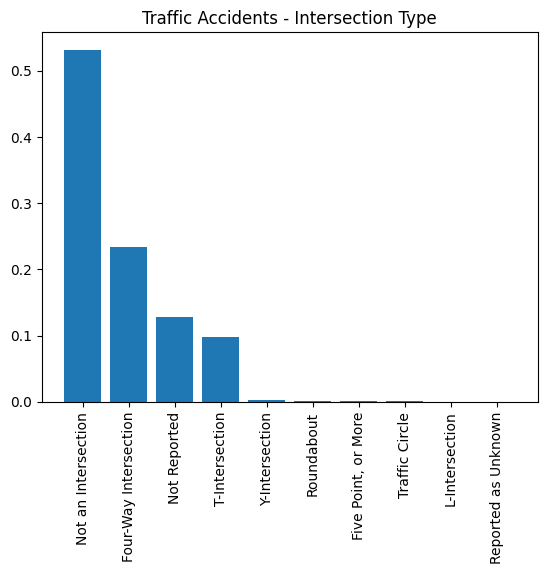

In [11]:
intersection = accidents2019.groupby('TYP_INTNAME')['CASENUM'].count().sort_values(ascending=False).reset_index()
intersection['CASENUM'] = intersection['CASENUM']/len(accidents2019)

display(intersection)

plt.bar(intersection['TYP_INTNAME'], intersection['CASENUM'])
plt.xticks(rotation = 90)
plt.title("Traffic Accidents - Intersection Type")
plt.show()


,URBANICITYNAME,CASENUM
0,Urban Area,0.776636
1,Rural Area,0.223364


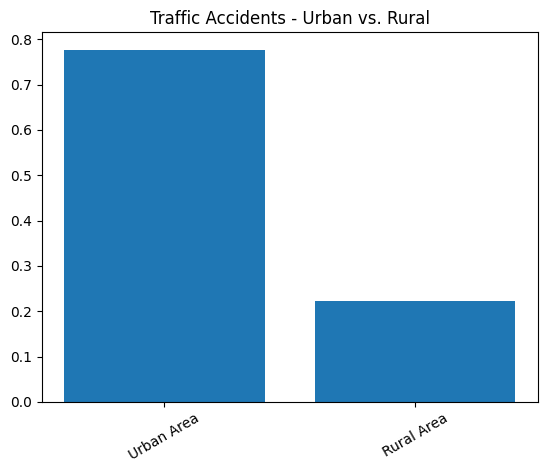

In [12]:
urban_rural = accidents2019.groupby('URBANICITYNAME')['CASENUM'].count().sort_values(ascending=False).reset_index()
urban_rural['CASENUM'] = urban_rural['CASENUM']/len(accidents2019)

display(urban_rural)

plt.bar(urban_rural['URBANICITYNAME'], urban_rural['CASENUM'])
plt.xticks(rotation = 30)
plt.title("Traffic Accidents - Urban vs. Rural")
plt.show()

,RELJCT2NAME,CASENUM
0,Not Reported,0.278906
1,Intersection-Related,0.230311
2,Intersection,0.219559
3,Non-Junction,0.170854
4,Driveway Access Related,0.062894
5,Entrance/Exit Ramp Related,0.010109
6,Driveway Access,0.009226
7,Entrance/Exit Ramp,0.009043
8,Through Roadway,0.003731
9,Crossover-Related,0.001544


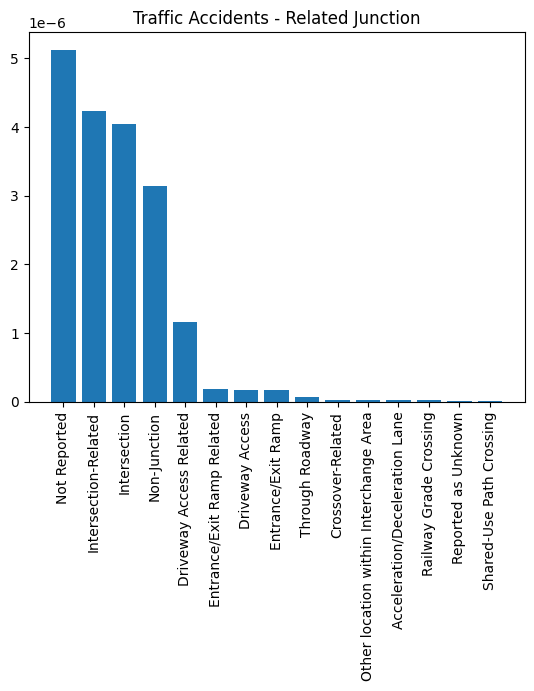

In [13]:
related_junction = accidents2019.groupby('RELJCT2NAME')['CASENUM'].count().sort_values(ascending=False).reset_index()
related_junction['CASENUM'] = related_junction['CASENUM']/len(accidents2019)


display(related_junction)

plt.bar(related_junction['RELJCT2NAME'], related_junction['CASENUM']/len(accidents2019))
plt.xticks(rotation = 90)
plt.title("Traffic Accidents - Related Junction")
plt.show()

,HOUR_IM,CASENUM
0,0,0.016541
1,1,0.012682
2,2,0.012388
3,3,0.009502
4,4,0.009520
5,5,0.017130
6,6,0.030271
7,7,0.052381
8,8,0.051168
9,9,0.041335


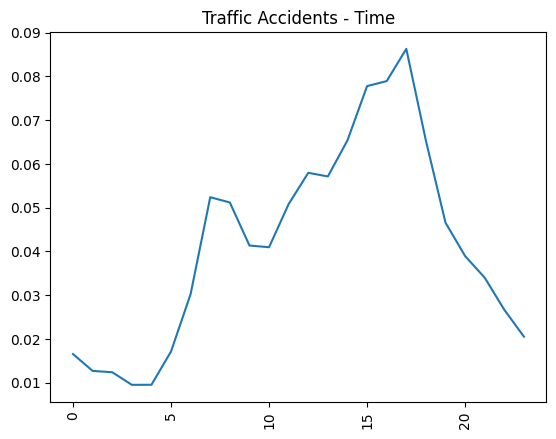

In [14]:
time = accidents2019.groupby('HOUR_IM')['CASENUM'].count().reset_index()
time['CASENUM'] = time['CASENUM']/len(accidents2019)

display(time)

plt.plot(time['HOUR_IM'], time['CASENUM'])
plt.xticks(rotation = 90)
plt.title("Traffic Accidents - Time")
plt.show()